In [26]:
import numpy as np 

action_values = np.zeros(10)

def select_greedy_action(action_values):
    return np.argmax(action_values)

def select_e_greedy_action(e, action_values):
    random_number = np.random.random(1)[0]
    if random_number > e:
        return np.argmax(action_values)
    else:
        return np.random.randint(0,10)

def create_normal_10_armed_bandit():
    mu, sigma = 0, 1 # mean and standard deviation
    return np.random.normal(mu, sigma, 10)

def get_bandit_function(bandits_means, bandits_sigma=1):
    noise_rewards = np.random.normal(bandits_means, bandits_sigma, 10)
    def bandit_fct(action):
        return noise_rewards[action]
    return bandit_fct

#bandit_fct = get_bandit_function(create_normal_10_armed_bandit(), 1)
#bandit_fct(4)

0.054193119217836427

In [91]:
test_action_values = np.array([0,1,2,3,4,5,6,7,8,9])

#Test of function e_greedy
count = 0
for i in range(100):
    a = select_e_greedy_action(0.01, test_action_values)
    if a != np.argmax(test_action_values):
        count += 1

print(count)

2


<class 'numpy.ndarray'>
True
True


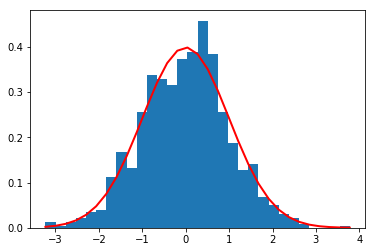

In [108]:
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

print(type(s))

#Verify the mean and the variance:
print(abs(mu - np.mean(s)) < 0.01)
print(abs(sigma - np.std(s, ddof=1)) < 0.01)

import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * 
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ), 
         linewidth=2, color='r')
plt.show()

In [30]:
def calc_estimate(action_rewards):
    return np.sum(action_rewards) / len(action_rewards)

def incremental_estimate(old_estimate, step_size, target):
    return old_estimate + (step_size * (target - old_estimate))

def select_e_greedy_action(epsilon, action_values):
    random_number = np.random.random(1)[0]
    if random_number > epsilon:
        return np.argmax(action_values)
    else:
        return np.random.randint(0,10)

def get_average_rewards(epsilon=0.1, optimistic=0., nb_runs=2000, nb_steps=1000):
    """
    Compute the average reward for different 10-armed bandit problems.
    
    Parameters
    ----------
    epsilon : float
        epsilon: probability of chosing a random action (exploration).
    optimistic: float
        Initial value value of all action-values.
    nb_runs: int
        Number of runs with different 10-armed bandits for the averaging.
    nb_steps: int
        Number of steps. How often each bandit is played.
    
    Returns
    -------
    numpy array (dtype: double)
        averaged rewards. i-th element in the array contains the average reward at iteration step i.
    numpy array (dtype: double)
        averaged percentage of using the optimal action. i-th element in the array contains the average reward at iteration step i.    
    """
    bandit_fct = get_bandit_function(create_normal_10_armed_bandit(), 1)
    action_values = np.zeros(10)
    selected_action = select_e_greedy_action(epsilon, action_values)
    reward = bandit_fct(selected_action)
    incremental_estimate(action_values[selected_action], )
    

3.5


array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])